## 题目二：采用不同的 SVM 核函数对多种类型数据集进行二分类

In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_classification, make_moons, make_circles
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


#### （1）使用 scikit-learn 中提供的样本生成器 make_blobs、make_classification、make_moons、
make_circles 生成一系列线性或非线性可分的二类别数据（数据量任取）。样本生成器的使用参考
官网：https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

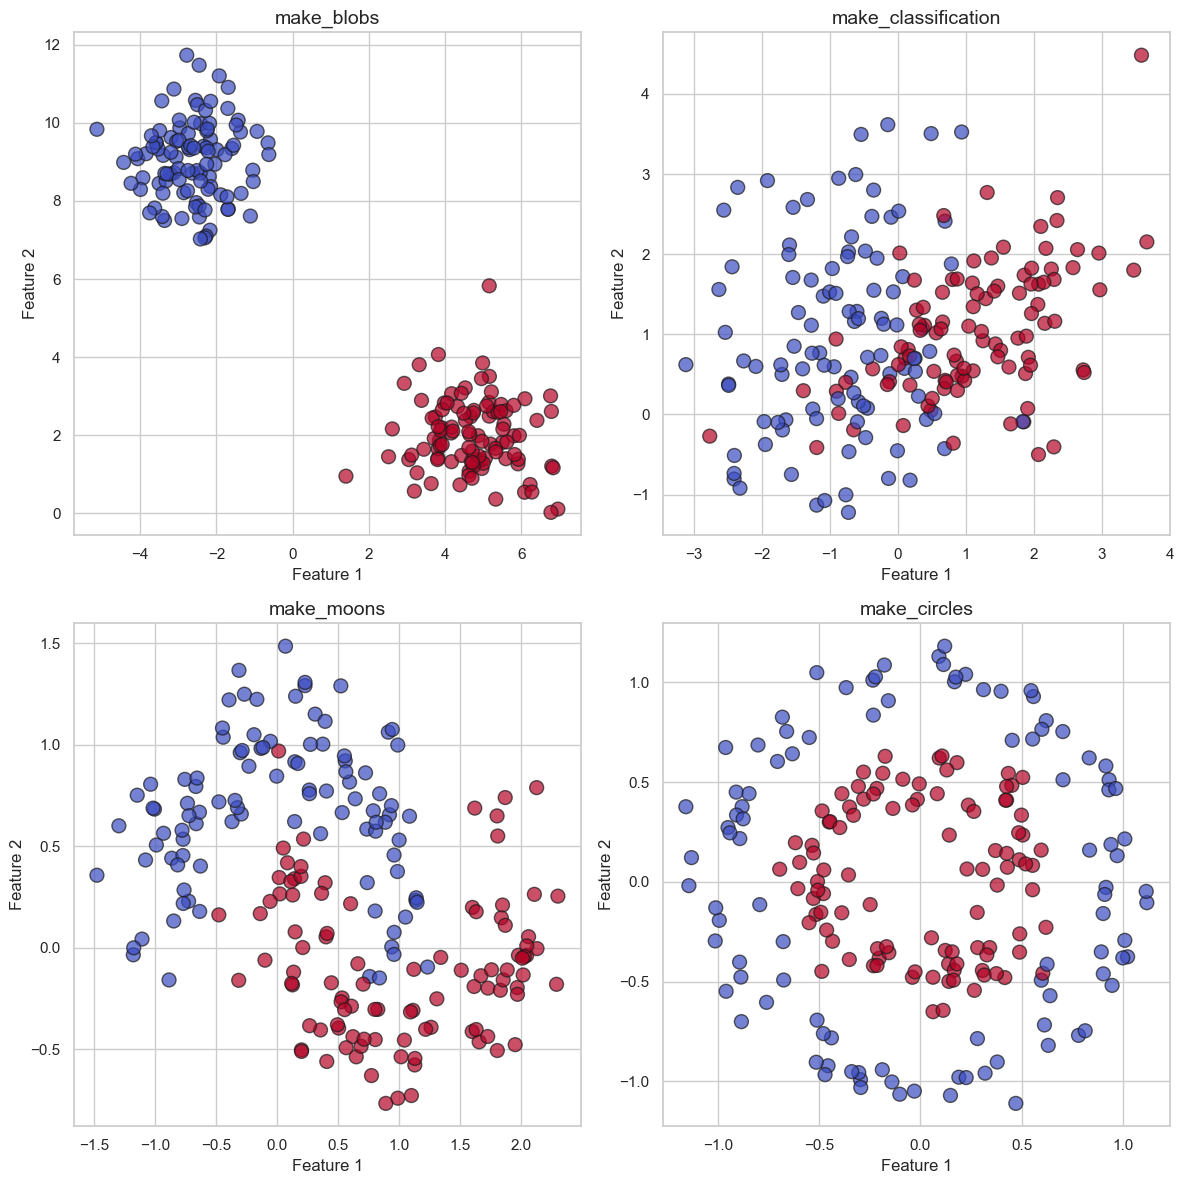

In [2]:
# 生成数据集
# 生成数据集
X_blob, y_blob = make_blobs(n_samples=200, centers=2, cluster_std=1.0, random_state=42)
X_classification, y_classification = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42)
X_moons, y_moons = make_moons(n_samples=200, noise=0.2, random_state=42)
X_circles, y_circles = make_circles(n_samples=200, factor=0.5, noise=0.1, random_state=42)

# 设置 seaborn 风格
sns.set(style="whitegrid", palette="muted")

# 绘制数据集
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# make_blobs
axes[0, 0].scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap='coolwarm', edgecolors='k', s=100, alpha=0.7)
axes[0, 0].set_title('make_blobs', fontsize=14)
axes[0, 0].set_xlabel('Feature 1', fontsize=12)
axes[0, 0].set_ylabel('Feature 2', fontsize=12)

# make_classification
axes[0, 1].scatter(X_classification[:, 0], X_classification[:, 1], c=y_classification, cmap='coolwarm', edgecolors='k', s=100, alpha=0.7)
axes[0, 1].set_title('make_classification', fontsize=14)
axes[0, 1].set_xlabel('Feature 1', fontsize=12)
axes[0, 1].set_ylabel('Feature 2', fontsize=12)

# make_moons
axes[1, 0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='coolwarm', edgecolors='k', s=100, alpha=0.7)
axes[1, 0].set_title('make_moons', fontsize=14)
axes[1, 0].set_xlabel('Feature 1', fontsize=12)
axes[1, 0].set_ylabel('Feature 2', fontsize=12)

# make_circles
axes[1, 1].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='coolwarm', edgecolors='k', s=100, alpha=0.7)
axes[1, 1].set_title('make_circles', fontsize=14)
axes[1, 1].set_xlabel('Feature 1', fontsize=12)
axes[1, 1].set_ylabel('Feature 2', fontsize=12)

# 调整布局并显示图形
plt.tight_layout()
plt.show()

#### （2）建模：分别将 SVM 中四种核函数（线性核、多项式核、高斯核、S 形核）用于上述四种数据集。
提示：对于每一种核函数，选择最适合的核参数（如 RBF 核中 gamma、多项式核中 degree 等）可通过超参数曲线帮助选择超参数。


In [3]:
scaler = StandardScaler()

# 标准化处理
X_blob = scaler.fit_transform(X_blob)
X_classification = scaler.fit_transform(X_classification)
X_moons = scaler.fit_transform(X_moons)
X_circles = scaler.fit_transform(X_circles)


In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 核函数选择及超参数优化
def train_svm(X, y, kernel, param_grid=None):
    # 使用 GridSearchCV 来进行超参数优化
    svm = SVC(kernel=kernel)
    grid_search = GridSearchCV(svm, param_grid, cv=5) if param_grid else GridSearchCV(svm, {}, cv=5)
    grid_search.fit(X, y)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    return best_model, best_params

# 定义不同核函数的超参数搜索空间
param_grids = {
    'linear': {'C': [0.1, 1, 10, 100]},
    'poly': {'degree': [2, 3, 4], 'coef0': [0, 1, 5], 'C': [0.1, 1, 10]},
    'rbf': {'gamma': ['scale', 'auto', 0.1, 1], 'C': [0.1, 1, 10]},
    'sigmoid': {'gamma': ['scale', 'auto', 0.1, 1], 'coef0': [0, 1, 5], 'C': [0.1, 1, 10]}
}

# 定义数据集及其名称
datasets = [
    (X_blob, y_blob, "make_blobs"),
    (X_classification, y_classification, "make_classification"),
    (X_moons, y_moons, "make_moons"),
    (X_circles, y_circles, "make_circles")
]

# 为每种数据集和核函数训练模型
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}
for kernel in kernels:
    models[kernel] = {}
    for X, y, name in datasets:
        model, best_params = train_svm(X, y, kernel, param_grids.get(kernel))
        models[kernel][name] = {'model': model, 'best_params': best_params}


（3）可视化：通过散点图可视化数据样本，并画出 SVM 模型的决策边界。


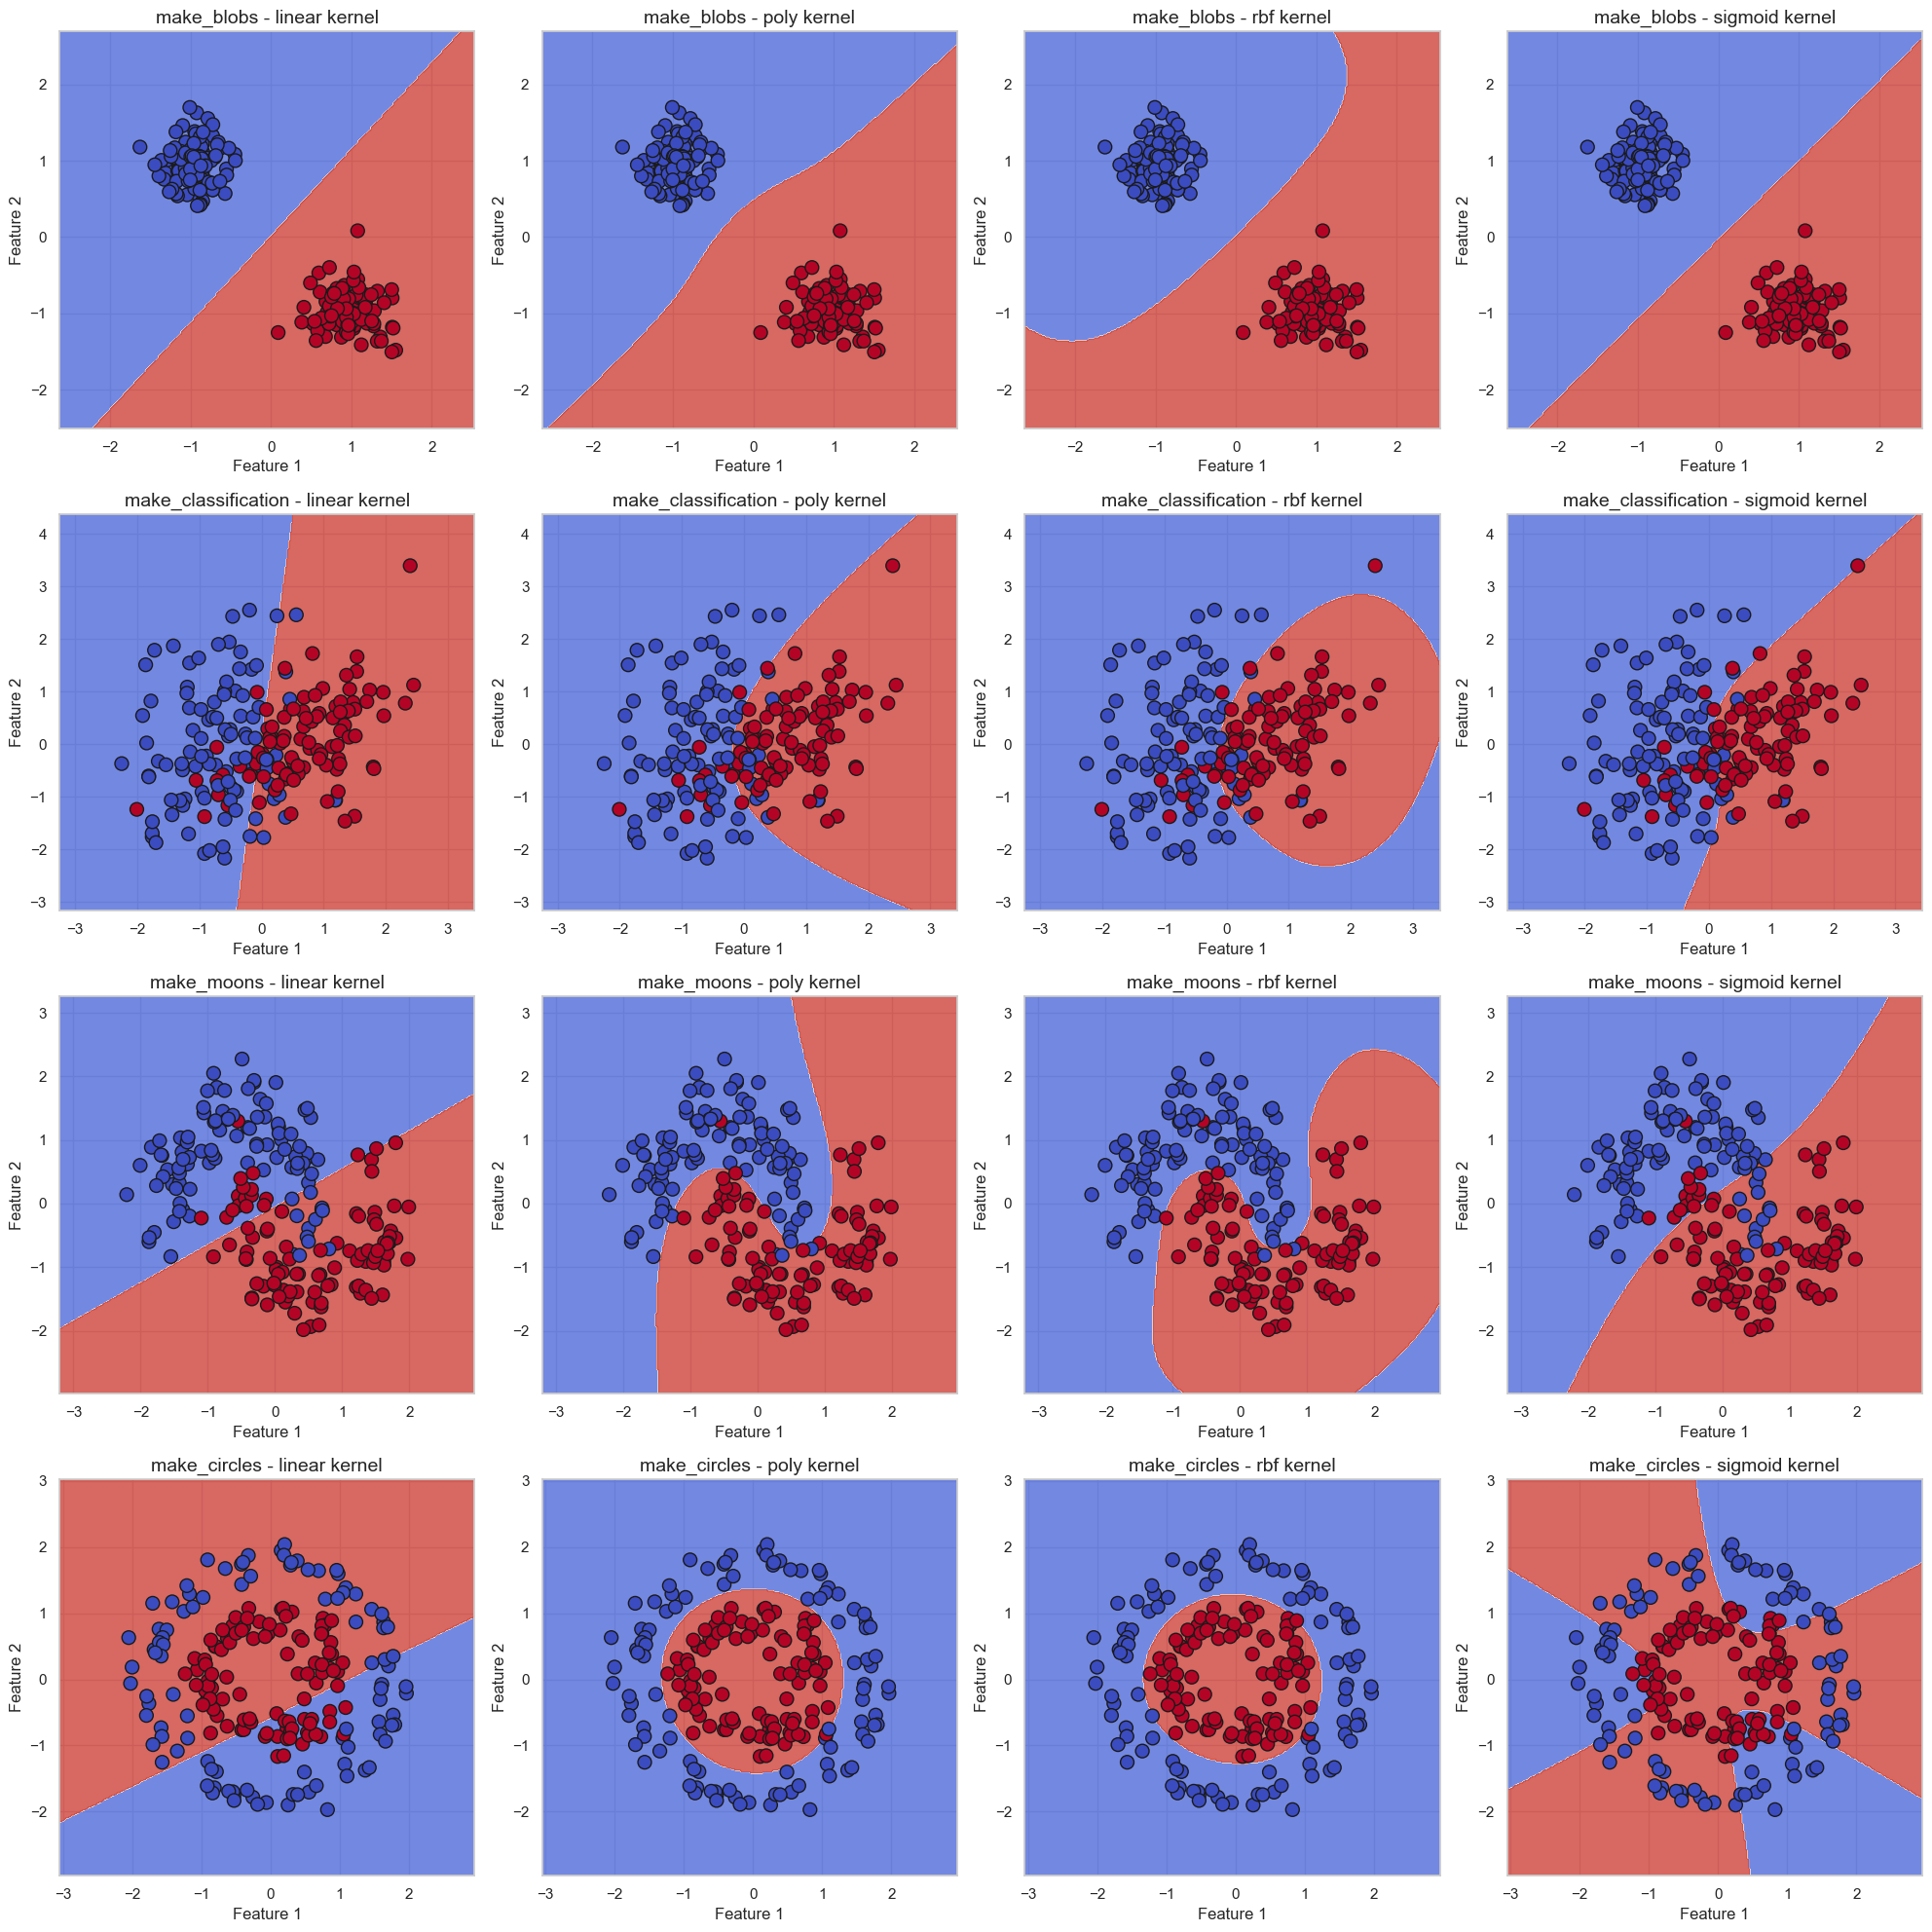

In [5]:
# 绘制决策边界函数
def plot_decision_boundary(X, y, model, ax, title):
    h = 0.02  # 网格步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # 预测决策边界
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 填充决策区域
    contour = ax.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=100, cmap="coolwarm")
    
    # 设置标题和格式
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Feature 1", fontsize=12)
    ax.set_ylabel("Feature 2", fontsize=12)

# 可视化每种数据集和核函数的决策边界
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i, (X, y, name) in enumerate(datasets):
    for j, kernel in enumerate(kernels):
        ax = axes[i, j]
        model = models[kernel][name]['model']
        plot_decision_boundary(X, y, model, ax, f"{name} - {kernel} kernel")

plt.tight_layout()
plt.show()

（4）模型评价：分类准确率。


In [8]:
# 计算每个模型的准确率
accuracy_results = {}

# 遍历每个核函数和每个数据集
for kernel in kernels:
    accuracy_results[kernel] = {}
    for X, y, name in datasets:
        X_scaled = scaler.transform(X)
        
        # 获取模型并预测结果
        model = models[kernel][name]['model']
        y_pred = model.predict(X_scaled)
        
        # 存储准确率结果
        accuracy_results[kernel][name] = accuracy_score(y, y_pred)

# 打印每个核函数与每个数据集的准确率
for kernel, accuracies in accuracy_results.items():
    print(f"Kernel: {kernel}")
    for dataset, accuracy in accuracies.items():
        print(f"  {dataset}: {accuracy:.4f}")
    print()

Kernel: linear
  make_blobs: 1.0000
  make_classification: 0.8450
  make_moons: 0.8500
  make_circles: 0.5350

Kernel: poly
  make_blobs: 1.0000
  make_classification: 0.8550
  make_moons: 0.9050
  make_circles: 0.6050

Kernel: rbf
  make_blobs: 1.0000
  make_classification: 0.8150
  make_moons: 0.8550
  make_circles: 0.5750

Kernel: sigmoid
  make_blobs: 1.0000
  make_classification: 0.8250
  make_moons: 0.8450
  make_circles: 0.5100



#### 【讨论三】如何选择最优超参数？
为每种模型选择适合的核函数及核参数，参数寻优方式自选。

1. **超参数空间**：
   - 为每种核函数（`linear`、`poly`、`rbf`、`sigmoid`）定义了不同的超参数搜索空间。
     - 例如，对于 `rbf` 核，我们搜索了不同的 `C` 和 `gamma` 值。
     - 对于 `poly` 核，除了 `C` 和 `gamma`，我们还尝试了不同的多项式阶数（`degree`）和常数项（`coef0`）。
   
2. **GridSearchCV**：
   - 我们通过 `GridSearchCV` 使用交叉验证来搜索最优超参数。`cv=5` 表示使用 5 折交叉验证。
   - `grid_search.best_estimator_` 返回最优模型，`grid_search.best_params_` 返回最优超参数。

3. **模型存储**：
   - 对于每种数据集和每个核函数，存储最优模型和最优参数，保存在 `best_models` 和 `best_params` 字典中。

4. **打印最优结果**：
   - 打印每个数据集、每种核函数对应的最优超参数和最优模型。



In [19]:
# 定义核函数的超参数搜索空间
param_grids = {
    'linear': {'C': [0.1, 1, 10, 100]},
    'poly': {'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'coef0': [0, 1, 5]},
    'rbf': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1]},
    'sigmoid': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1], 'coef0': [0, 1, 5]}
}

# 存储每个模型的最佳参数和最优模型
best_models = {}
best_params = {}

# 为每个数据集和核函数训练模型并优化超参数
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
datasets = [(X_blob, y_blob), (X_classification, y_classification), 
            (X_moons, y_moons), (X_circles, y_circles)]
titles = ["make_blobs", "make_classification", "make_moons", "make_circles"]

for kernel in kernels:
    best_models[kernel] = {}
    best_params[kernel] = {}
    for i, (X, y) in enumerate(datasets):
        # 创建 SVM 模型
        svm = SVC(kernel=kernel)
        
        # 获取超参数搜索空间
        param_grid = param_grids[kernel]
        
        # 使用 GridSearchCV 进行超参数优化
        grid_search = GridSearchCV(svm, param_grid, cv=5)
        grid_search.fit(X, y)
        
        # 存储最优模型和最优参数
        best_models[kernel][titles[i]] = grid_search.best_estimator_
        best_params[kernel][titles[i]] = grid_search.best_params_

# 打印最优参数
for kernel in kernels:
    print(f"Kernel: {kernel}")
    for dataset in titles:
        print(f"  {dataset} - Best Params: {best_params[kernel][dataset]}")
        print(f"  {dataset} - Best Model: {best_models[kernel][dataset]}")

Kernel: linear
  make_blobs - Best Params: {'C': 0.1}
  make_blobs - Best Model: SVC(C=0.1, kernel='linear')
  make_classification - Best Params: {'C': 0.1}
  make_classification - Best Model: SVC(C=0.1, kernel='linear')
  make_moons - Best Params: {'C': 0.1}
  make_moons - Best Model: SVC(C=0.1, kernel='linear')
  make_circles - Best Params: {'C': 1}
  make_circles - Best Model: SVC(C=1, kernel='linear')
Kernel: poly
  make_blobs - Best Params: {'C': 0.1, 'coef0': 0, 'degree': 3}
  make_blobs - Best Model: SVC(C=0.1, coef0=0, kernel='poly')
  make_classification - Best Params: {'C': 0.1, 'coef0': 1, 'degree': 2}
  make_classification - Best Model: SVC(C=0.1, coef0=1, degree=2, kernel='poly')
  make_moons - Best Params: {'C': 0.1, 'coef0': 5, 'degree': 4}
  make_moons - Best Model: SVC(C=0.1, coef0=5, degree=4, kernel='poly')
  make_circles - Best Params: {'C': 0.1, 'coef0': 5, 'degree': 3}
  make_circles - Best Model: SVC(C=0.1, coef0=5, kernel='poly')
Kernel: rbf
  make_blobs - Best 

### 【讨论四】不同核函数在不同数据集上表现如何？
通过观察不同核函数在不同数据集上的决策边界和分类准确率，分析不同核函数的适用场合。

#### 核函数

1. **线性核函数（`linear`）**：
   - **适用场景**：当数据是线性可分时，线性核函数会非常有效。它能找到一个简单的直线（在二维情况下）或超平面来将两类数据分开。
   - **表现**：对于 `make_blobs` 和 `make_classification` 这类线性可分数据，线性核函数通常会得到非常好的结果。对于复杂的非线性数据集（如 `make_moons` 和 `make_circles`），线性核的表现通常较差，决策边界会出现明显的误分类区域。

2. **多项式核函数（`poly`）**：
   - **适用场景**：当数据具有多项式关系时，多项式核函数能够很好地拟合数据。适用于数据间的决策边界是曲线形态，或者存在某种多项式关系的情况。
   - **表现**：在 `make_moons` 和 `make_circles` 这样的非线性数据集上，多项式核能够相对较好地拟合决策边界，尤其是在阶数较高时（`degree` 设置为 3 或 4）。对于线性可分数据集（如 `make_blobs` 和 `make_classification`），多项式核会有一定的过拟合倾向，尤其在数据集简单时。

3. **高斯 RBF 核函数（`rbf`）**：
   - **适用场景**：RBF 核函数非常适合处理复杂的非线性数据，它通过高维空间中的映射捕捉数据的非线性关系。其强大的局部建模能力使其在多种类型的数据集上表现优秀。
   - **表现**：RBF 核函数在 `make_moons` 和 `make_circles` 这类非线性数据集上表现非常好，能够很精确地拟合复杂的决策边界。对于 `make_blobs` 和 `make_classification` 这类线性可分数据，RBF 核也能很好地拟合，尽管它可能会引入一些不必要的复杂度（过拟合）。

4. **Sigmoid 核函数（`sigmoid`）**：
   - **适用场景**：Sigmoid 核函数通常用于神经网络中，但在 SVM 中也可以尝试。它通常用来模拟神经网络的激活函数。
   - **表现**：Sigmoid 核通常不是最佳选择，因为它可能会导致决策边界的过度非线性化，从而增加模型的复杂度，尤其是在数据集较简单时（如 `make_blobs` 和 `make_classification`）。对于复杂的数据集（如 `make_moons` 和 `make_circles`），它有时能捕捉到一些非线性结构，但整体表现可能不如 RBF 核。
   
#### 数据集

1. **`make_blobs` 数据集**：
   - 线性核将显示一个简单的直线边界，准确地划分两类数据。
   - 多项式核和 RBF 核会适应数据的分布，形成相对复杂的决策边界，但其表现与线性核相比可能有所过拟合。
   - Sigmoid 核则可能会生成一些不必要的复杂边界，导致分类器对简单问题过度拟合。

2. **`make_classification` 数据集**：
   - 对于该数据集，线性核通常能很好地找到决策边界。
   - 多项式核和 RBF 核同样能较好地拟合，尤其在数据分布复杂时。
   - Sigmoid 核则可能会在数据简单的情况下导致过拟合。

3. **`make_moons` 数据集**：
   - 对于这种半月形的非线性数据，线性核将无法很好地拟合数据，决策边界会显得不准确。
   - 多项式核和 RBF 核能较好地捕捉到数据的非线性特性，形成精确的决策边界。
   - Sigmoid 核有时会表现不错，但通常比 RBF 核略差。

4. **`make_circles` 数据集**：
   - `make_circles` 是经典的环状非线性数据集，线性核无法处理此类数据。
   - RBF 核和多项式核能够很好地识别数据的环状结构。
   - Sigmoid 核有时表现较差，难以适应复杂的非线性分布。